In [2]:
import torch
import pickle
import gzip
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [3]:
file = gzip.open("mnist.pkl.gz")
((x_train, y_train), (x_valid, y_valid), _ )=pickle.load(file, encoding='latin-1')

In [7]:
x_train[0].shape

(784,)

In [8]:
28*28

784

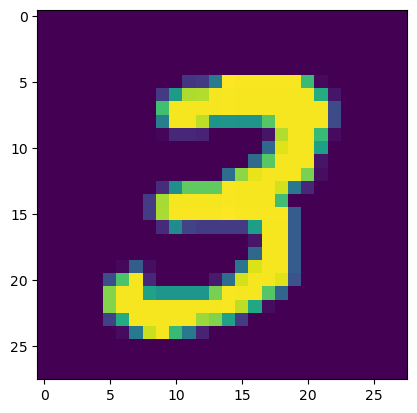

In [17]:
sample_image=x_train[7]
sample_image=sample_image.reshape((28, 28))
plt.imshow(sample_image)

In [18]:
y_train[7]

3

# Überlegungen zur Netzarchitektur

InputNeuronen: 784
OutputNeuronen: 10

    - Neuron 0 --> wenn der Wert hier am höchsten ist. Dann soll es eine 0 sein
    - Neuron 1 --> wenn der Wert hier am höchsten ist. Dann soll es eine 1 sein
    - Neuron 2 --> wenn der Wert hier am höchsten ist. Dann soll es eine 2 sein
    - Neuron 3 --> wenn der Wert hier am höchsten ist. Dann soll es eine 3 sein
    ...


In [20]:
loss = nn.CrossEntropyLoss()